In [46]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people

In [2]:
lfw_dataset = fetch_lfw_people(min_faces_per_person = 50)

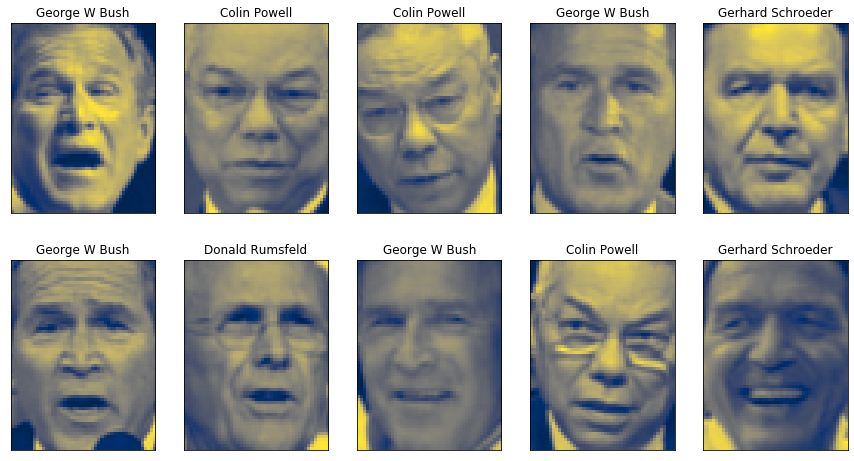

In [44]:
fig, axes = plt.subplots(2, 5, figsize = (15,8), subplot_kw = {'xticks' : (), 'yticks' : ()})
for target, image, ax in zip(lfw_dataset.target, lfw_dataset.images, axes.ravel()):
    ax.imshow(image,cmap = 'cividis')
    ax.set_title(lfw_dataset.target_names[target])
                                                               

In [45]:
print('lfw_dataset.images.shape',lfw_dataset.images.shape)
print('Distinct faces',len(lfw_dataset.target_names))

lfw_dataset.images.shape (1489, 62, 47)
Distinct faces 11


In [78]:
from collections import Counter
dicti = Counter()
for i in lfw_dataset.target:
    dicti[lfw_dataset.target_names[i]]+=1
for name,count in dicti.items():
    print("{0:30}{1:4}".format(name,count))
# counts = np.bincount(lfw_dataset.target)

George W Bush                  530
Colin Powell                   236
Gerhard Schroeder              109
Donald Rumsfeld                121
Jacques Chirac                  52
Tony Blair                     144
Ariel Sharon                    77
Junichiro Koizumi               60
Jean Chretien                   55
Serena Williams                 52
John Ashcroft                   53


**To make the data less skewed, we will only take up to 50 images of each person (otherwise, the feature extraction would be overwhelmed by the likelihood of George W. Bush)**

In [95]:
mask = np.zeros(lfw_dataset.target.shape, dtype = np.bool)
for target in np.unique(lfw_dataset.target):
    mask[np.where(lfw_dataset.target == target)[0][:50]] = 1

X_people = lfw_dataset.data[mask]
y_people = lfw_dataset.target[mask]

X_people/=255.0

In [160]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

print(knn.score(X_test,y_test))

0.4420289855072464


In [304]:
pca = PCA(n_components = 100, whiten = True, random_state = 42).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print('X_train_pca.shape',X_train_pca.shape)

X_train_pca.shape (412, 100)


In [305]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train_pca,y_train)

print(knn.score(X_test_pca,y_test))

0.5289855072463768


In [306]:
print('pca.components.shape',pca.components_.shape)

pca.components.shape (100, 2914)


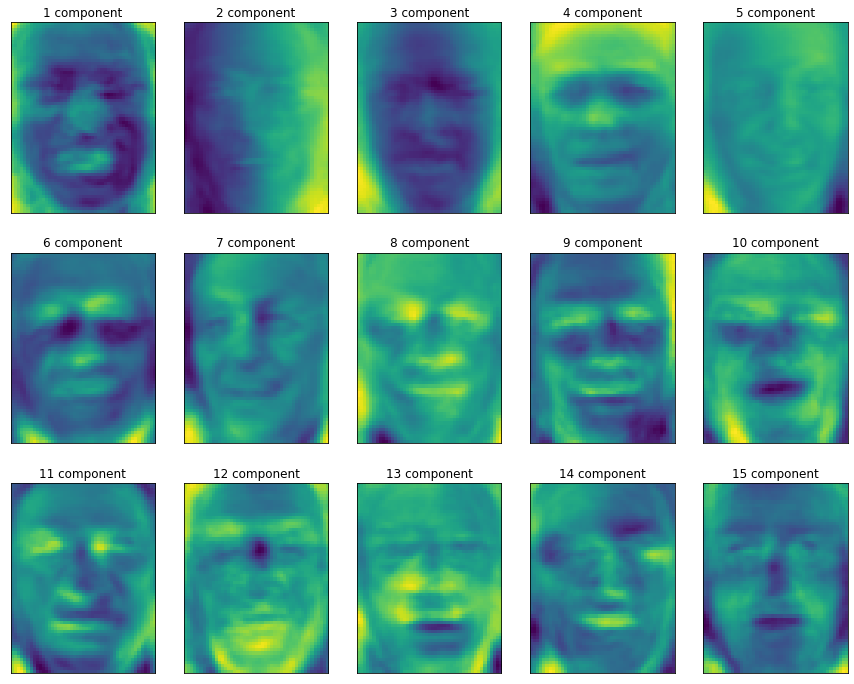

In [307]:
fig, axes = plt.subplots(3, 5, figsize = (15,12), subplot_kw = {'xticks':(), 'yticks':()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(lfw_dataset.images[0].shape), cmap = 'viridis')
    ax.set_title(str(i+1)+" component")

In [319]:
def weighted_sum(coefficients, pca_component):
    return np.dot(coefficients,pca_component)

Text(0.5, 1.0, 'Gerhard Schroeder\noriginal')

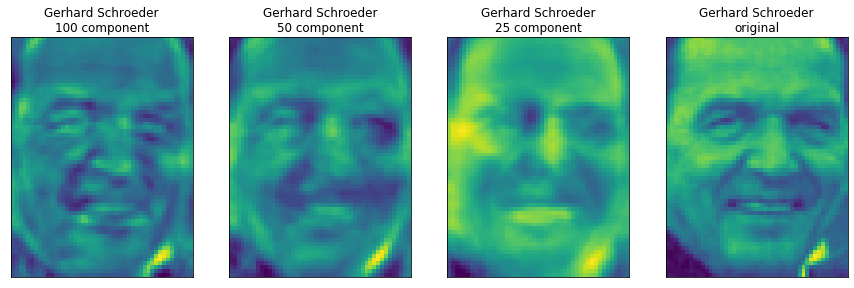

In [464]:
#For Train Set
index = np.random.randint(0,412)
fig, axes = plt.subplots(1,4, figsize = (15,15),subplot_kw = {'xticks':(), 'yticks':()})
constructed_image_100 = weighted_sum(X_train_pca[index], pca.components_)
constructed_image_50 = weighted_sum(X_train_pca[index,:50], pca.components_[:50])
constructed_image_25 = weighted_sum(X_train_pca[index,:25], pca.components_[:25])

axes[0].imshow(constructed_image_100.reshape(lfw_dataset.images[0].shape))
axes[0].set_title('{0}{1}'.format(lfw_dataset.target_names[y_train[index]],'\n100 component'))

axes[1].imshow(constructed_image_50.reshape(lfw_dataset.images[0].shape))
axes[1].set_title('{0}{1}'.format(lfw_dataset.target_names[y_train[index]],'\n50 component'))

axes[2].imshow(constructed_image_25.reshape(lfw_dataset.images[0].shape))
axes[2].set_title('{0}{1}'.format(lfw_dataset.target_names[y_train[index]],'\n25 component'))

axes[3].imshow(X_train[index].reshape(lfw_dataset.images[0].shape))
axes[3].set_title('{0}{1}'.format(lfw_dataset.target_names[y_train[index]],'\noriginal'))

Text(0.5, 1.0, 'George W Bush\noriginal')

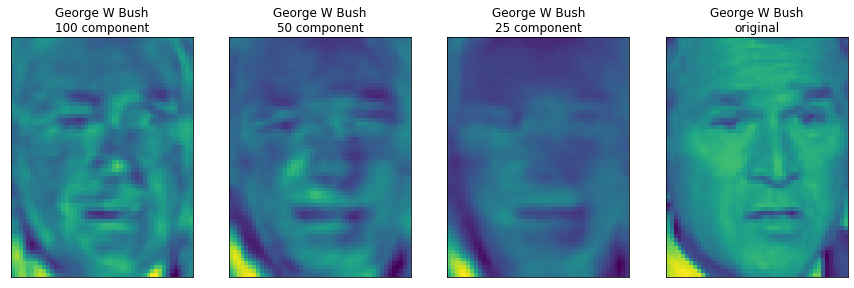

In [477]:
#For Test Set
index = np.random.randint(0,138)
fig, axes = plt.subplots(1,4, figsize = (15,15),subplot_kw = {'xticks':(), 'yticks':()})
constructed_image_100 = weighted_sum(X_test_pca[index], pca.components_)
constructed_image_50 = weighted_sum(X_test_pca[index,:50], pca.components_[:50])
constructed_image_25 = weighted_sum(X_test_pca[index,:25], pca.components_[:25])

axes[0].imshow(constructed_image_100.reshape(lfw_dataset.images[0].shape))
axes[0].set_title('{0}{1}'.format(lfw_dataset.target_names[y_test[index]],'\n100 component'))

axes[1].imshow(constructed_image_50.reshape(lfw_dataset.images[0].shape))
axes[1].set_title('{0}{1}'.format(lfw_dataset.target_names[y_test[index]],'\n50 component'))

axes[2].imshow(constructed_image_25.reshape(lfw_dataset.images[0].shape))
axes[2].set_title('{0}{1}'.format(lfw_dataset.target_names[y_test[index]],'\n25 component'))

axes[3].imshow(X_test[index].reshape(lfw_dataset.images[0].shape))
axes[3].set_title('{0}{1}'.format(lfw_dataset.target_names[y_test[index]],'\noriginal'))

# THE END